### K-Means



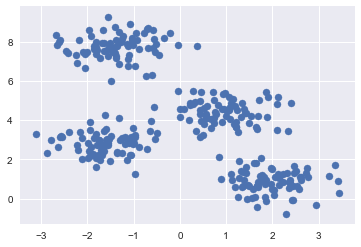

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [3]:
X.shape

(300, 2)

array([1, 2, 0, 2, 1, 1, 3, 0, 2, 2])

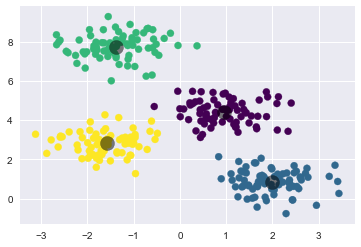

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
y_kmeans[:10]

In [4]:
kmeans.cluster_centers_,kmeans.labels_[:10], kmeans.n_iter_

(array([[ 1.98258281,  0.86771314],
        [-1.37324398,  7.75368871],
        [-1.58438467,  2.83081263],
        [ 0.94973532,  4.41906906]]), array([0, 1, 3, 1, 0, 0, 2, 3, 1, 1]), 4)

### Example of K Means Clustering not working

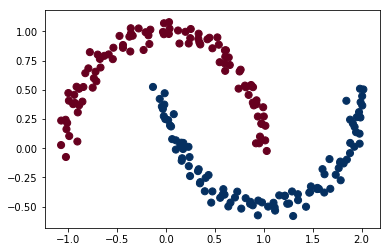

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)
plt.scatter(X[:,0], X[:,1], c = y, s = 50, cmap = 'RdBu')

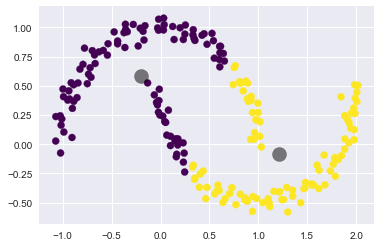

In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

#this shows the failure of Kmeans clustering

C:\miniconda3\envs\data\lib\site-packages\sklearn\manifold\spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


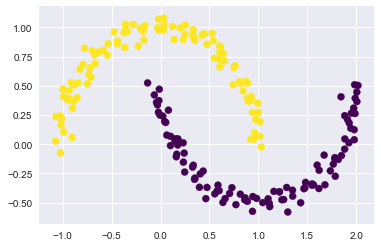

In [7]:
#above situation can be addressed as follows - 

from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
model.fit(X)
y = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')

### K Means on Digits Dataset

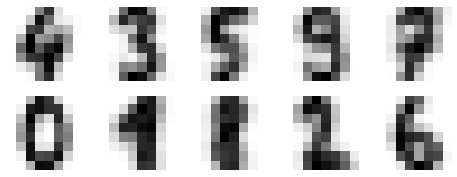

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
digits = load_digits()

kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data) #assigned labels ot each cluster. 

#Note that K-Means doesn't know about original labels

fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

The result is 10 clusters in 64 dimensions. Notice that the cluster centers themselves are 64-dimensional points, and **can themselves be interpreted as the "typical" digit within the cluster.** 

Be careful that though K-Means was able to mark 10 clusters and assigned each cluster a number from 0 to 9, it doesn't mean that it assigned 0 to clusters having 0 digits. 

In [7]:
digits.data[:1]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
         15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
          8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
          5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
          1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
          0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

In [8]:
print(digits.keys())
print(digits.data.shape)
print(digits.images.shape)
print(digits.target.shape)

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
(1797, 64)
(1797, 8, 8)
(1797,)


In [10]:
print(kmeans.labels_)
print(set(kmeans.labels_))

[5 7 7 ..., 7 3 3]
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [14]:
print(kmeans.cluster_centers_.shape)
centers.shape

(10, 64)


(10, 8, 8)

In [15]:
kmeans.inertia_

1165177.713706214

### K-Means for Color Compression

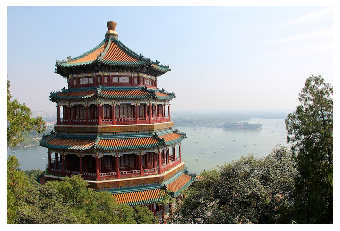

In [66]:
# Note: this requires the ``pillow`` package to be installed
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [67]:
#The image itself is stored in a 3-d array of size (ht, wid, RGB), containing red/blue/green contributions as 
#integers from 0 to 255:
print(china.shape),
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3) #427 ht points, 640 wid points, RGB values for each combination of ht and wid point.
print(data.shape) #we have total 427*640 = 273280 combinations

(427, 640, 3)
(273280, 3)


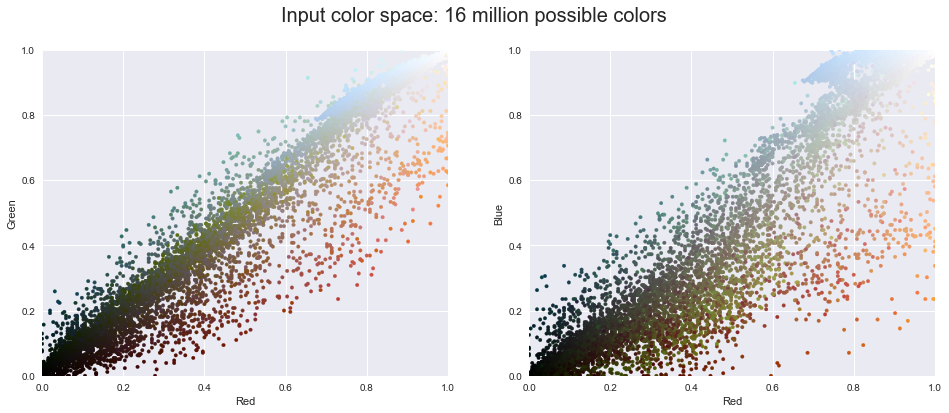

In [68]:
#We can visualize these pixels in this color space, using a subset of 10,000 pixels for efficiency:


def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N] #random selection of 10000 data points (out of 273280 points)
    colors = colors[i] #masking. i is mask. 
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);
    
plot_pixels(data, title='Input color space: 16 million possible colors')    

Now let's reduce these 16 million colors to just 16 colors, using a k-means clustering across the pixel space. Because we are dealing with a very large dataset, we will use the mini batch k-means, which operates on subsets of the data to compute the result much more quickly than the standard k-means algorithm:

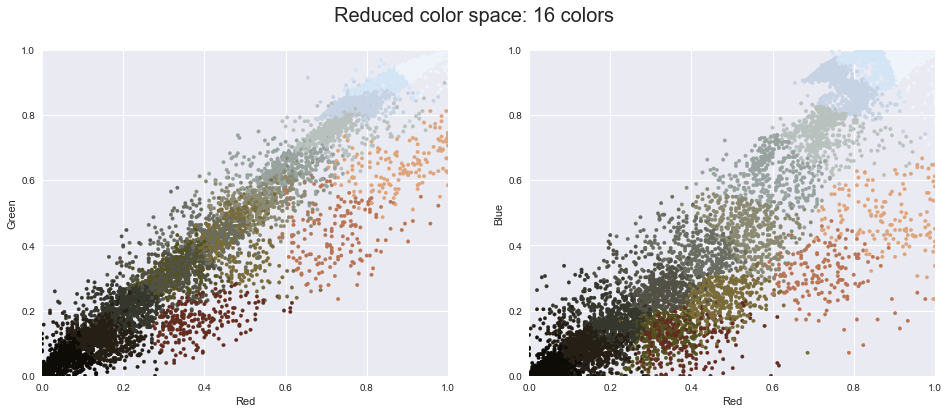

In [69]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

In [70]:
kmeans.predict(data)

array([ 4,  4,  4, ..., 13,  3,  3])

In [71]:
kmeans.cluster_centers_

array([[ 0.32177813,  0.31643081,  0.27147894],
       [ 0.93564197,  0.95309422,  0.979479  ],
       [ 0.72658907,  0.45393849,  0.32451631],
       [ 0.05149739,  0.0486581 ,  0.02643089],
       [ 0.77124056,  0.82848784,  0.89370676],
       [ 0.59664375,  0.63825487,  0.62364973],
       [ 0.41506441,  0.42692461,  0.37912806],
       [ 0.47507543,  0.42365521,  0.22710006],
       [ 0.1449096 ,  0.12150495,  0.08771087],
       [ 0.38591822,  0.17210354,  0.12016827],
       [ 0.32819645,  0.31833463,  0.13046664],
       [ 0.72375334,  0.7587164 ,  0.7486406 ],
       [ 0.83117989,  0.89629866,  0.96657022],
       [ 0.20664391,  0.21213311,  0.17301646],
       [ 0.54034897,  0.53775696,  0.4451601 ],
       [ 0.8715164 ,  0.64421264,  0.47814535]])

In [72]:
new_colors

array([[ 0.77124056,  0.82848784,  0.89370676],
       [ 0.77124056,  0.82848784,  0.89370676],
       [ 0.77124056,  0.82848784,  0.89370676],
       ..., 
       [ 0.20664391,  0.21213311,  0.17301646],
       [ 0.05149739,  0.0486581 ,  0.02643089],
       [ 0.05149739,  0.0486581 ,  0.02643089]])

The result is a re-coloring of the original pixels, where each pixel is assigned the color of its closest cluster center. Plotting these new colors in the image space rather than the pixel space shows us the effect of this:


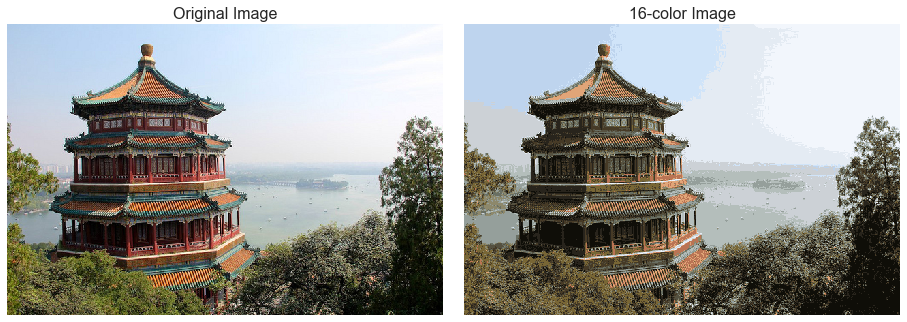

In [13]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);

### The Elbow Method - KMeans

attribute `intertia_` : - Sum of squared distances of samples to their closest cluster center.


Text(0,0.5,'WCSS')

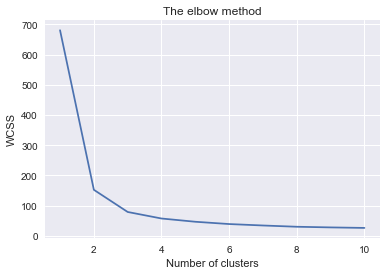

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
wcss = []

iris = load_iris()
for i in range(1,11):
    model = KMeans(n_clusters = i)
    model.fit(iris.data)
    wcss.append(model.inertia_)

plt.plot(range(1,11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [21]:
wcss

[680.82439999999997,
 152.36870647733906,
 78.940841426146022,
 57.317873214285711,
 46.535582051282049,
 38.945953671062369,
 34.189205468656269,
 30.001881875582676,
 27.829093301435407,
 26.138882478632482]

You can clearly see why it is called 'The elbow method'. From the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration. Now that we have the optimum number of clusters (that is,3), we can move on to applying K-means clustering to the Iris dataset.

In [24]:
model = KMeans(n_clusters = 3)
model.fit(iris.data)
cluster = model.predict(iris.data)

In [25]:
cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

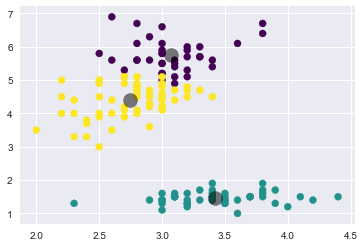

In [31]:
plt.scatter(iris.data[:,1], iris.data[:,2], c=cluster, s=50, cmap='viridis')
centers = model.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5);

In [30]:
centers

array([[ 6.85      ,  3.07368421,  5.74210526,  2.07105263],
       [ 5.006     ,  3.418     ,  1.464     ,  0.244     ],
       [ 5.9016129 ,  2.7483871 ,  4.39354839,  1.43387097]])

### DBSCAN Clustering

This approach of clustering works well when number of clusters are not known *a priori* and data points follow different geometries which are not addressed by circle based approach by K-Means. 

In one of two-moons examples above, the failure of K-Means was evident. However, the same can be addressed by DBSCAN clustering algorithm. 

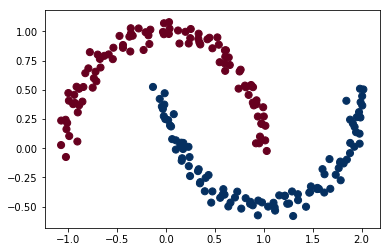

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)
plt.scatter(X[:,0], X[:,1], c = y, s = 50, cmap = 'RdBu');

In [2]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = .5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)
clusters

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1], dtype=int32)

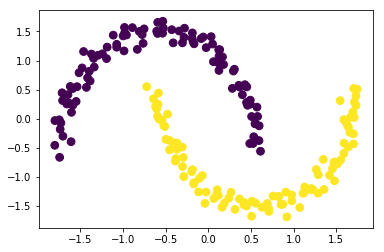

In [4]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=60);

First, remember that `-1` denotes noise points, while `0` and `1` represent clusters. In above case, we find no noise points. 
Also, setting up the parameters `eps` and `min_samples` is very important. The parameter `eps` is somewhat more important, as it determines what it means for points to be “close”. Setting `eps` to be very small will mean that no points are core samples, and may lead to all points being labeled as noise. Setting `eps` to be very large will result in all points forming a single cluster.

Increasing `eps` means that more points will be included in a cluster. This makes clusters grow, but might also lead to multiple clusters joining into one. Increasing `min_samples` means that fewer points will be core points, and more points will be labeled as noise.

The setting of `min_samples` mostly determines whether points in less dense regions will be labeled as outliers, or as their own cluster. If you decrease `min_samples`, anything that would have been a cluster with less than `min_samples` many samples will now be labeled as noise. The `min_samples` therefore determines the minimum cluster size.

### GMM

#### K- means vs GMM

There is no probability model in K-means and K-means does the ‘hard assignment’ of a data point to a cluster. It says that a particular data point either belongs to a given cluster or it doesn’t. On the other hand, GMM is a probabilistic model and it does the ‘soft assignment’. It assigns probabilities to a data point belonging to given clusters. 
